PUNTO 2


Usando tasa de aprendizaje ajustada: 0.0054686014077492415
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
Usando tasa de aprendizaje ajustada: 0.0005468601407749242
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
Usando tasa de aprendizaje ajustada: 5.468601407749242e-05
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
Usando tasa de aprendizaje ajustada: 5.4686014077492415e-06
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
Usando tasa de aprendizaje ajustada: 5.468601407749241e-07
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.

Resultados finales:
Error en entrenamiento 

/Users/belengotz/Desktop/TP 04 MNyO/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


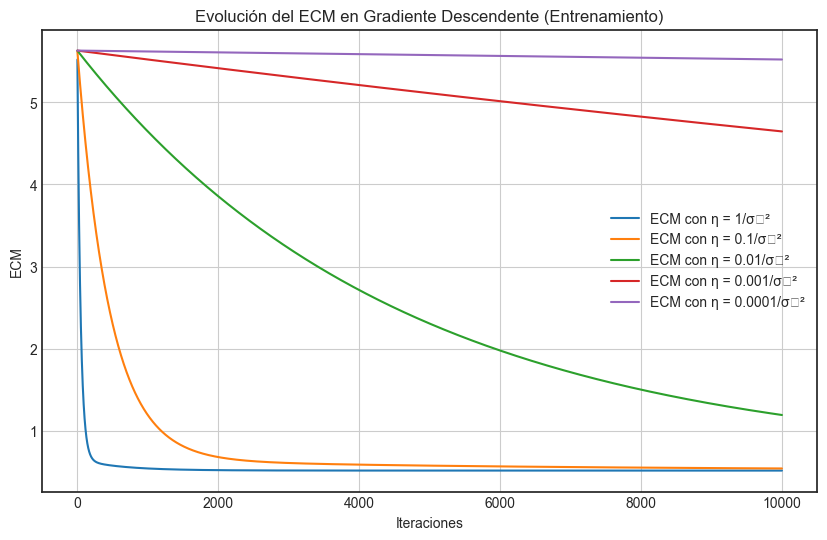

/Users/belengotz/Desktop/TP 04 MNyO/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


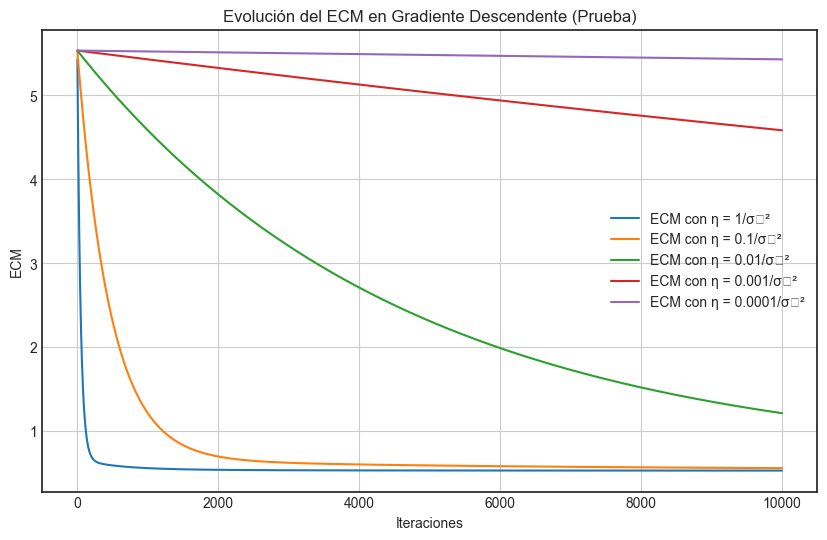

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_and_prepare_data():
    data = fetch_california_housing()
    X, y = data.data, data.target
    
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1]) 
    X_test[:, :-1] = scaler.transform(X_test[:, :-1])
    
    return X_train, X_test, y_train, y_test

def pseudoinverse_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def gradient_descent_solution(X, y, learning_rate=0.01, tol=1e-6, max_iter=10000):
    n, d = X.shape
    w = np.zeros(d)
    trajectory = []
    errors = []
    
    for i in range(max_iter):
        gradient = -2 / n * X.T @ (y - X @ w)
        
        w -= learning_rate * gradient
        
        trajectory.append(w.copy())

        error = np.mean((y - X @ w)**2)
        errors.append(error)
        
        if np.linalg.norm(gradient) < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones.")
            break
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return w, np.array(trajectory), errors

def plot_ecm(errors, learning_rates, title):
    plt.style.use('seaborn-v0_8-white')
    plt.figure(figsize=(10, 6))
    for idx, error in enumerate(errors):
        plt.plot(error, label=f"ECM con η = {learning_rates[idx]}/σ₁²")
    plt.xlabel("Iteraciones")
    plt.ylabel("ECM")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()




X_train, X_test, y_train, y_test = load_and_prepare_data()
w_analytical = pseudoinverse_solution(X_train, y_train)

U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
sigma_cuad = S[0]

errors_train = []
errors_test = []
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    lr_scaled = lr / sigma_cuad
    print(f"Usando tasa de aprendizaje ajustada: {lr_scaled}")
    
    w_gd_train, trajectory_train, error_train = gradient_descent_solution(
        X_train, y_train, learning_rate=lr_scaled
    )
    errors_train.append(error_train)
    
    _, _, error_test = gradient_descent_solution(
        X_test, y_test, learning_rate=lr_scaled
    )
    errors_test.append(error_test)

train_error_analytical = np.mean((y_train - X_train @ w_analytical) ** 2)
train_error_gd = np.mean((y_train - X_train @ w_gd_train) ** 2)

test_error_analytical = np.mean((y_test - X_test @ w_analytical) ** 2)
test_error_gd = np.mean((y_test - X_test @ w_gd_train) ** 2)

print("\nResultados finales:")
print(f"Error en entrenamiento (Analítico): {train_error_analytical:.5f}")
print(f"Error en entrenamiento (Gradiente Descendente): {train_error_gd:.5f}")
print(f"Error en prueba (Analítico): {test_error_analytical:.5f}")
print(f"Error en prueba (Gradiente Descendente): {test_error_gd:.5f}")

plot_ecm(errors_train, learning_rates, "Evolución del ECM en Gradiente Descendente (Entrenamiento)")
plot_ecm(errors_test, learning_rates, "Evolución del ECM en Gradiente Descendente (Prueba)")


Comparen la solución obtenida por la pseudoinversa con la solución iterativa del gradiente descendente para distintos valores de η.

Muestren el error en el conjunto de entrenamiento y de prueba frente al número de iteraciones para gradiente descendente.

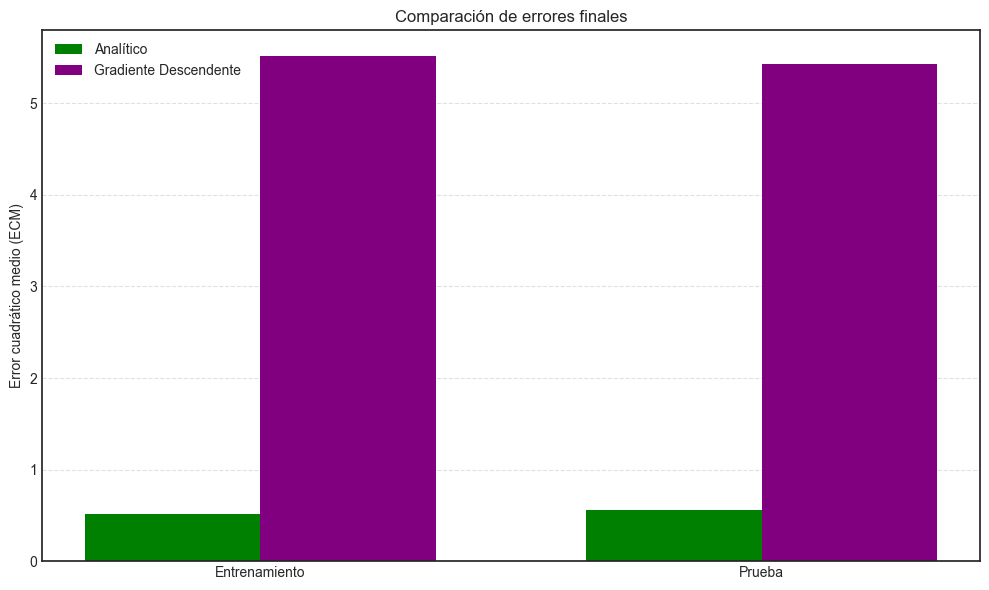

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_error_evolution(errors_train, errors_test):
    plt.figure(figsize=(12, 6))
    plt.plot(errors_train[0], label="Error en entrenamiento (Gradiente Descendente)", color="blue")
    plt.plot(errors_test[0], label="Error en prueba (Gradiente Descendente)", color="orange")
    plt.xlabel("Iteraciones")
    plt.ylabel("Error cuadrático medio (ECM)")
    plt.title("Evolución del error durante el gradiente descendente")
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

def plot_error_comparison(train_error_analytical, train_error_gd, test_error_analytical, test_error_gd):
    labels = ["Entrenamiento", "Prueba"]
    analytical_errors = [train_error_analytical, test_error_analytical]
    gd_errors = [train_error_gd, test_error_gd]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, analytical_errors, width, label="Analítico", color="green")
    plt.bar(x + width/2, gd_errors, width, label="Gradiente Descendente", color="purple")
    plt.ylabel("Error cuadrático medio (ECM)")
    plt.title("Comparación de errores finales")
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True, axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
"""
Error en entrenamiento (Analítico): 0.51793
Error en entrenamiento (Gradiente Descendente): 5.52127
Error en prueba (Analítico): 0.55589
Error en prueba (Gradiente Descendente): 5.42714
"""


plot_error_comparison(train_error_analytical, train_error_gd, test_error_analytical, test_error_gd)


In [ ]:
def plot_error_comparison_multiple_lr(learning_rates, train_errors_analytical, train_errors_gd, test_errors_analytical, test_errors_gd):
    """
    Gráfico de barras para comparar errores analíticos y de gradiente descendente para múltiples tasas de aprendizaje.

    Parameters:
    - learning_rates: Lista de tasas de aprendizaje usadas.
    - train_errors_analytical: Error analítico en entrenamiento (constante para todas las tasas de aprendizaje).
    - train_errors_gd: Lista de errores GD en entrenamiento para cada tasa.
    - test_errors_analytical: Error analítico en prueba (constante para todas las tasas de aprendizaje).
    - test_errors_gd: Lista de errores GD en prueba para cada tasa.
    """
    labels = [f"η = {lr}" for lr in learning_rates]
    x = np.arange(len(labels))
    width = 0.2
    
    plt.figure(figsize=(14, 8))
    
    plt.bar(x - width, train_errors_gd, width, label="GD Entrenamiento", color="purple")
    plt.bar(x, [train_errors_analytical] * len(learning_rates), width, label="Analítico Entrenamiento", color="green")
    
    plt.bar(x + width, test_errors_gd, width, label="GD Prueba", color="orange")
    plt.bar(x + 2 * width, [test_errors_analytical] * len(learning_rates), width, label="Analítico Prueba", color="skyblue")
    
    plt.ylabel("Error cuadrático medio (ECM)")
    plt.title("Comparación de errores para múltiples tasas de aprendizaje")
    plt.xticks(x, labels, rotation=45)
    legend = plt.legend(loc='best', frameon=True, facecolor='white', edgecolor='black')
    for text in legend.get_texts():
        text.set_color('black')
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


In [27]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
train_errors_gd = []
test_errors_gd = []

for lr in learning_rates:
    lr_scaled = lr / sigma_cuad

    w_gd_train, _, _ = gradient_descent_solution(X_train, y_train, learning_rate=lr_scaled)
    train_errors_gd.append(np.mean((y_train - X_train @ w_gd_train) ** 2))
    
    w_gd_test, _, _ = gradient_descent_solution(X_test, y_test, learning_rate=lr_scaled)
    test_errors_gd.append(np.mean((y_test - X_test @ w_gd_test) ** 2))


No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.


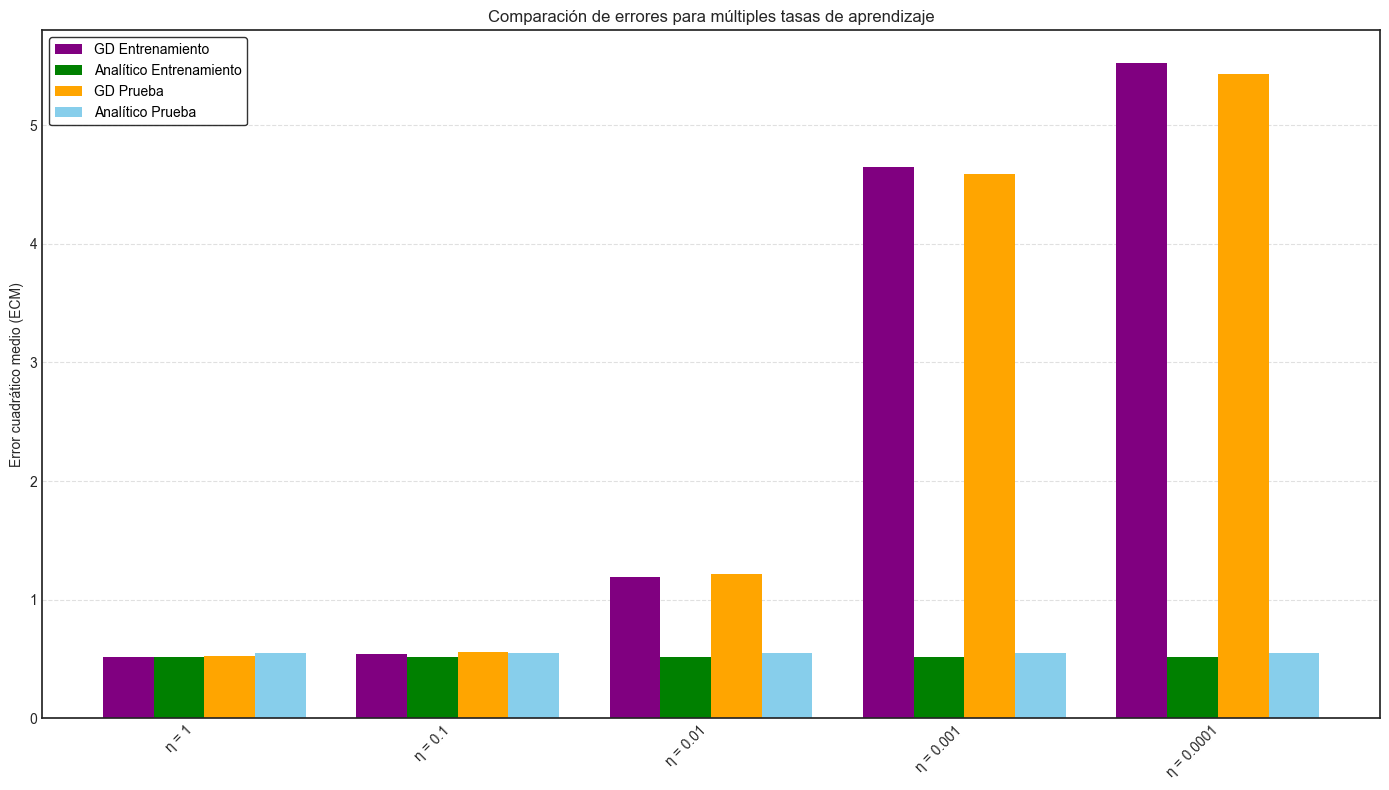


Resultados finales:
Error en entrenamiento (Analítico): 0.51793
Error en entrenamiento (Gradiente Descendente): 5.52127
Error en prueba (Analítico): 0.55589
Error en prueba (Gradiente Descendente): 5.42714


In [31]:
plot_error_comparison_multiple_lr(
    learning_rates,
    train_error_analytical,
    train_errors_gd,
    test_error_analytical,
    test_errors_gd
)

print("\nResultados finales:")
print(f"Error en entrenamiento (Analítico): {train_error_analytical:.5f}")
print(f"Error en entrenamiento (Gradiente Descendente): {train_error_gd:.5f}")
print(f"Error en prueba (Analítico): {test_error_analytical:.5f}")
print(f"Error en prueba (Gradiente Descendente): {test_error_gd:.5f}")

Lambda: 1e-06*σ₁, Training MSE: 0.518033506844822, Test MSE: 0.5561381958144751
Lambda: 0.01*σ₁, Training MSE: 0.9264496825563238, Test MSE: 0.916463900955015
Lambda: 0.1*σ₁, Training MSE: 1.2643969981966137, Test MSE: 1.240930259977301
Lambda: 1*σ₁, Training MSE: 1.328963457073004, Test MSE: 1.303159524271741


/Users/belengotz/Desktop/TP 04 MNyO/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) STIXGeneral.
  fig.canvas.print_figure(bytes_io, **kw)


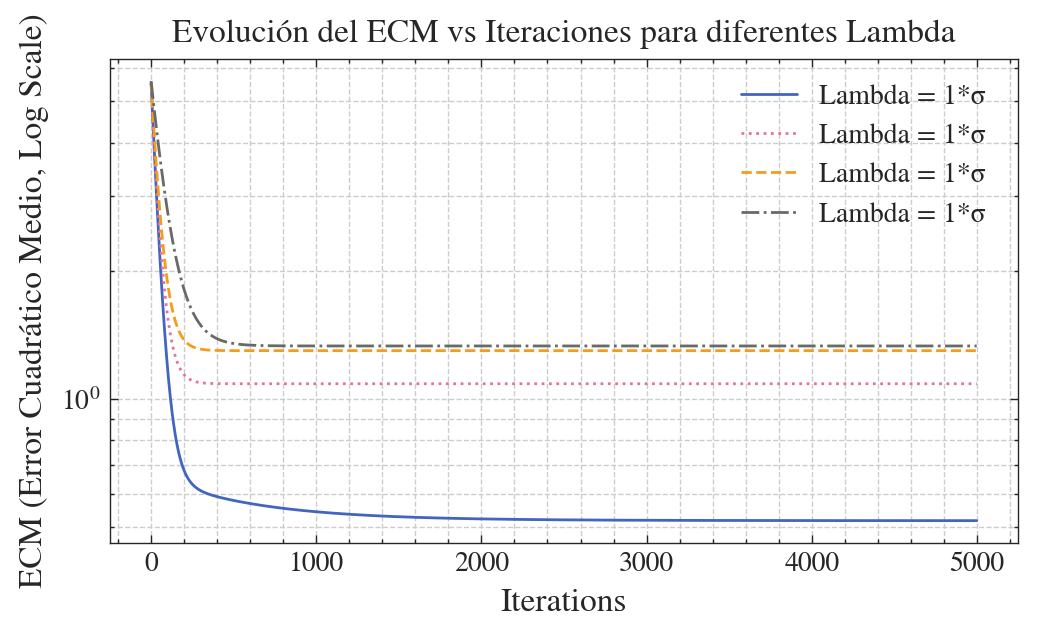

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


plt.style.use('figs.mplstyle')

data = fetch_california_housing()
X, y = data.data, data.target

X = np.hstack([np.ones((X.shape[0], 1)), X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

def ridge_gradient_descent_with_tracking(X, y, lambd, lr, epochs=1000):
    n, d = X.shape
    w = np.zeros(d)
    loss_history = []
    for epoch in range(epochs):
        gradient = -2 / n * X.T @ (y - X @ w) + 2 * lambd * w
        gradient[0] -= 2 * lambd * w[0]
        w -= lr * gradient
        loss = np.mean((y - X @ w) ** 2) + lambd * np.sum(w[1:] ** 2)
        loss_history.append(loss)
    return w, loss_history

sigma1 = np.linalg.svd(X_train, compute_uv=False)[0]
lambdas = [0.000001* sigma1, 0.01 * sigma1, 0.1 * sigma1, sigma1]
eee = [0.000001, 0.01, 0.1, 1]
#lambdas = [0.000001* sigma1]

loss_histories = {}
for i, lambd in enumerate(lambdas):
    lr = 1 / (sigma1 + lambd) #dynamic learning rate
    w, loss_history = ridge_gradient_descent_with_tracking(X_train, y_train, lambd, lr, epochs=5000)
    loss_histories[lambd] = loss_history

    train_mse = mean_squared_error(y_train, X_train.dot(w))
    test_mse = mean_squared_error(y_test, X_test.dot(w))
    print(f"Lambda: {eee[i]}*σ₁, Training MSE: {train_mse}, Test MSE: {test_mse}")

plt.figure(figsize=(5, 3))
for lambd, loss_history in loss_histories.items():
    plt.plot(loss_history, label=f"Lambda = {eee[i]}*σ₁")
plt.xlabel("Iterations")
plt.ylabel("ECM (Error Cuadrático Medio, Log Scale)")
plt.title("Evolución del ECM vs Iteraciones para diferentes Lambda")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()